In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**In this project, my main aim is to show ways to go deep into the data story-telling even though the dataset is small. Also, I will work on a model that could give us an approximation as to what will be the charges of the patients. Nevertheless, we must go deeply into what factors influenced the charge of a specific patient. In order to do this we must look for patterns in our data analysis and gain extensive insight of what the data is telling us. Lastly, we will go step by step to understand the story behind the patients in this dataset only through this way we could have a better understanding of what features will help our model have a closer accuracy to the true patient charge.**

In [2]:
data = pd.read_csv("/kaggle/input/medical-cost/insurance.csv")

In [3]:
df = data

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
for column in df.columns:
    print(f"{column} contains unique {df[column].nunique()} values.")

age contains unique 47 values.
sex contains unique 2 values.
bmi contains unique 548 values.
children contains unique 6 values.
smoker contains unique 2 values.
region contains unique 4 values.
charges contains unique 1337 values.


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


*Quick Insights*
* Dataset is too small as it only contains 1382 records with 7 features.
* Data do not contain any missing values.
* Data contains 1 duplicate record.
* sex and region are having categories as there values.

**Exploratory Data Analysis + Cleaning**

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.reset_index(inplace =True)

In [15]:
df.drop("index",axis = 1,inplace = True)

<Figure size 600x600 with 0 Axes>

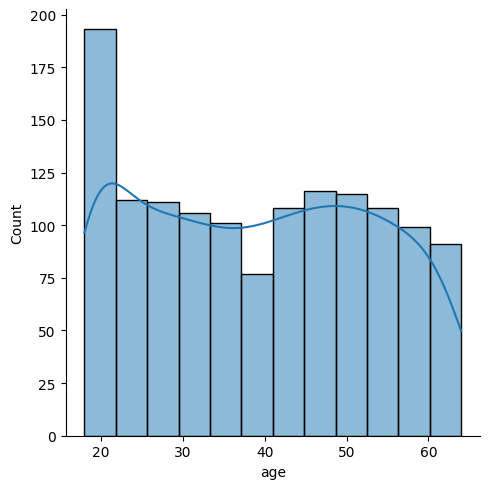

In [16]:
##age
plt.figure(figsize = (6,6))
sns.displot(data = df,x = "age",kde = True)

* There is a clear spike in age around 20 and decrease in age around 40.

<Axes: xlabel='age', ylabel='charges'>

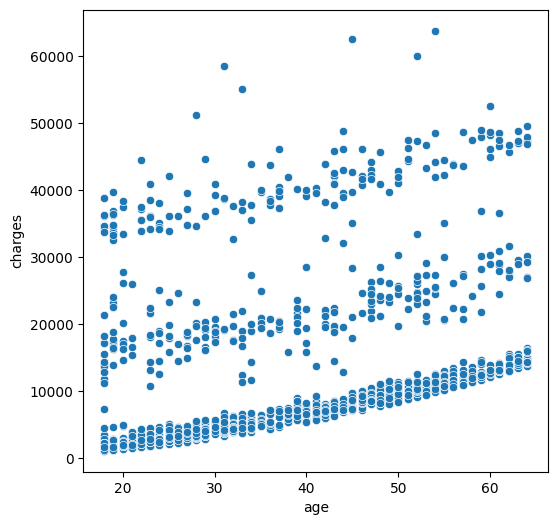

In [17]:
## age Vs Charges
plt.figure(figsize = (6,6))
sns.scatterplot(data = df, x = "age",y = "charges")

* There is positive linear relationship between age and charges but not perfectly linear.
* But there are some outliers present at every age bin-size, this may be due to smoking or any other health issue.

<Axes: xlabel='sex', ylabel='age'>

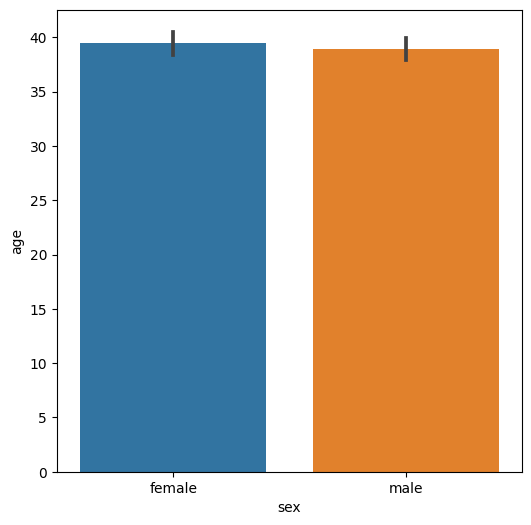

In [18]:
plt.figure(figsize = (6,6))
sns.barplot(data = df,x = "sex",y = "age")

* There is no such difference between averege age for male and female.

<Axes: xlabel='smoker', ylabel='age'>

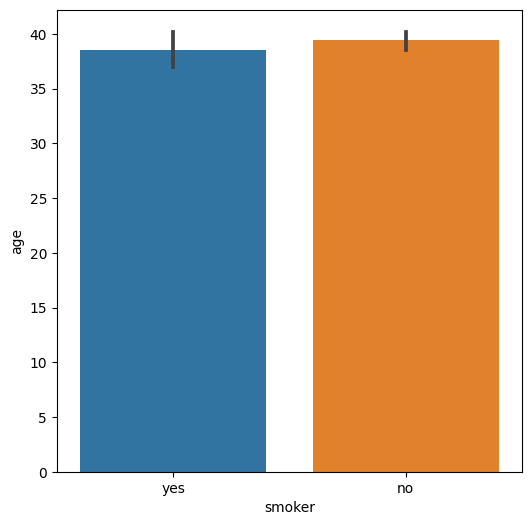

In [19]:
plt.figure(figsize = (6,6))
sns.barplot(data = df,x = "smoker",y = "age")

* The average age of smoker and non-smoker is very close, showing a small difference.

<Axes: ylabel='count'>

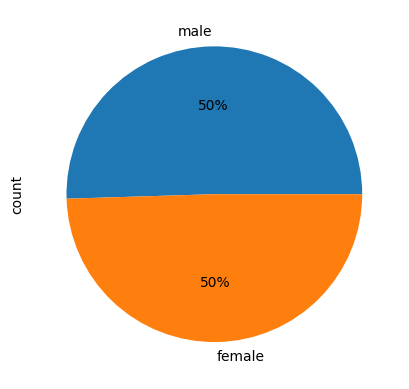

In [20]:
## sex
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%")

* Proportion of both male and female are same.

<Axes: xlabel='sex', ylabel='count'>

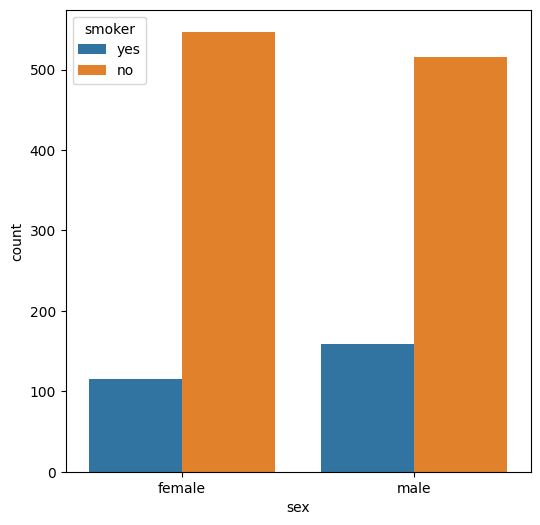

In [21]:
## sex vs smoker
plt.figure(figsize = (6,6))
sns.countplot(data = df,x = "sex",hue ="smoker")

* Males are more smokers than feamle smokers.

<Axes: xlabel='sex', ylabel='bmi'>

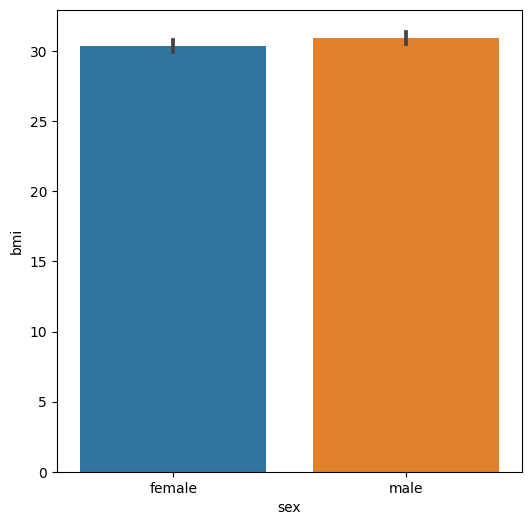

In [22]:
## sex Vs bmi
plt.figure(figsize = (6,6))
sns.barplot(data = df,x = "sex",y = "bmi")

* Average BMI of both male and female are almost same.


<Axes: xlabel='sex', ylabel='charges'>

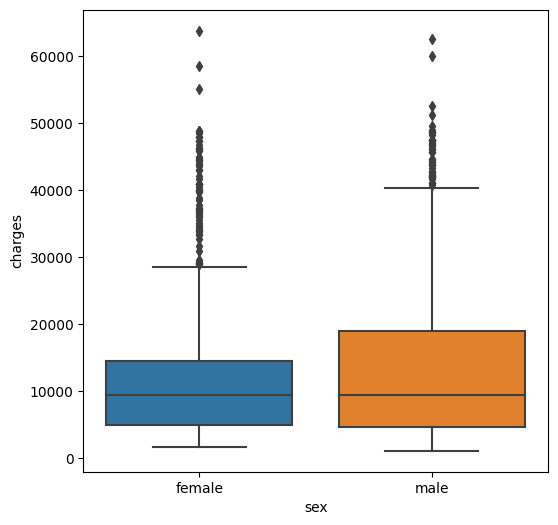

In [23]:
## sex Vs charges
plt.figure(figsize = (6,6))
sns.boxplot(data = df,x = "sex",y = "charges")

* Female charges are relatively low compared to male charges.But the count of outliers are more in female than male.

<Figure size 600x600 with 0 Axes>

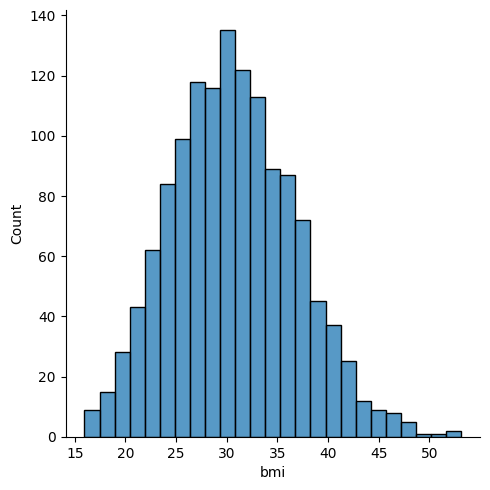

In [24]:
## bmi
plt.figure(figsize = (6,6))
sns.displot(data = df,x = "bmi")

* BMI is normally distributed.
* Most individuals have bmi equals to 30 and very few have bmi 50 .

<Axes: xlabel='smoker', ylabel='bmi'>

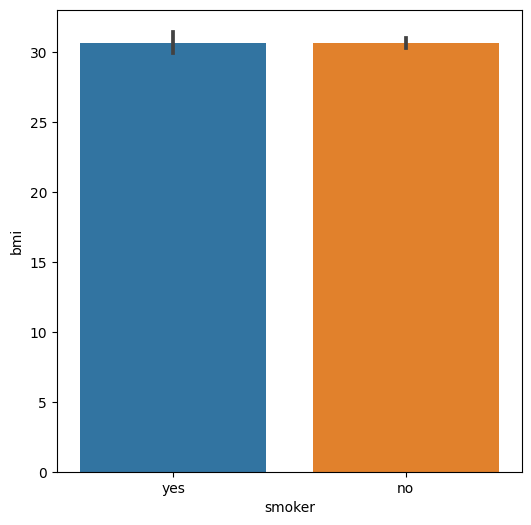

In [25]:
plt.figure(figsize =(6,6))
sns.barplot(data = df,x = "smoker",y = "bmi")

* Average bmi of smoker and non- smoker is amost same.

<Axes: xlabel='bmi', ylabel='charges'>

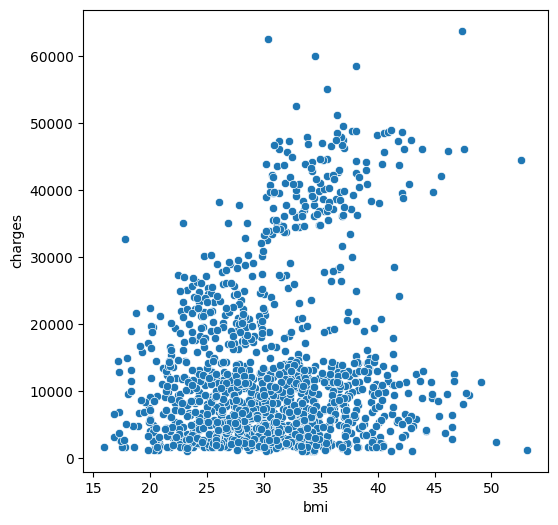

In [26]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df,x = "bmi",y = "charges")

* There is no linearlity between bmi and charges.
* There is very dense cloud of data_points with increase in bmi but charges remain same for around 10000.
* Persons with BMI ranges from 30-35 have the high charges.

<Axes: xlabel='children', ylabel='count'>

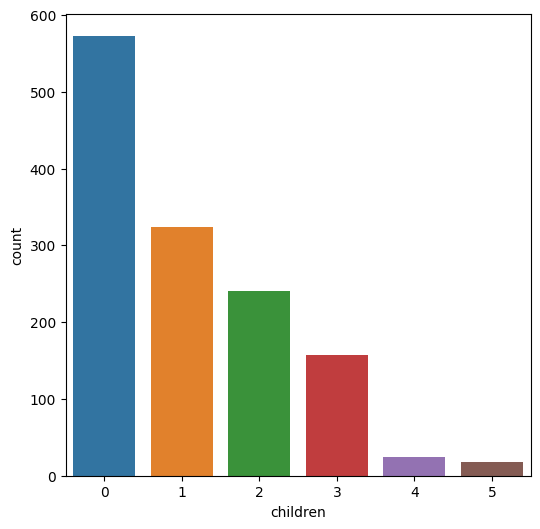

In [27]:
### Children
plt.figure(figsize = (6,6))
sns.countplot(data = df,x ="children")

* There is inverse relation between number of children and patients.
* More than 40% of the persons have 0 children whereas less than 5% of patients have 4 or 5 children.

<Axes: xlabel='sex', ylabel='count'>

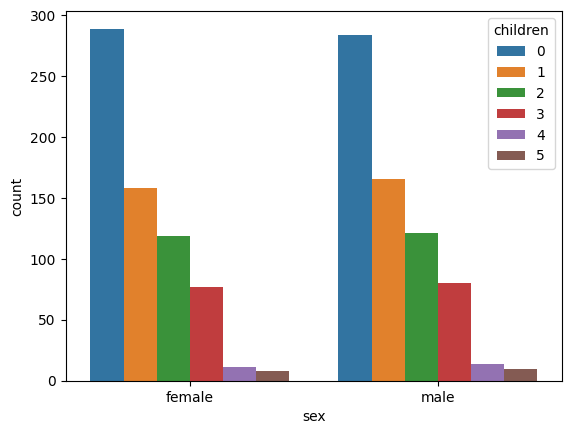

In [28]:
## Sex Vs Children
sns.countplot(data = df,x = "sex",hue = "children")

* All proportions are same for number of children with the sex of patients.

<Axes: xlabel='children', ylabel='charges'>

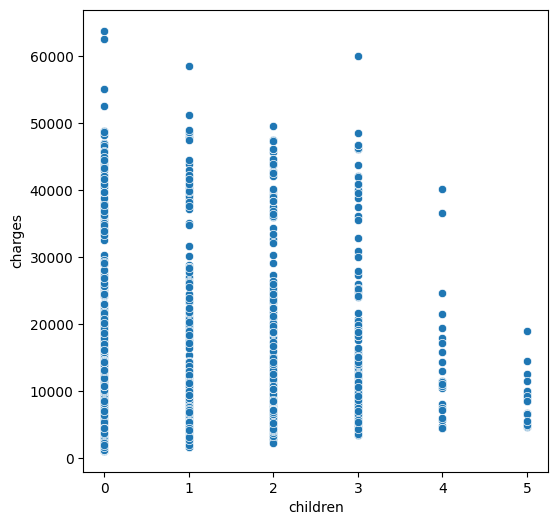

In [29]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df,x = "children",y = "charges")

In [31]:
""" It is clearly observable that patients with 0 childern have high charges.
As the number of children increases the charges decreases."""


' It is clearly observable that patients with 0 childern have high charges.\nAs the number of children increases the charges decreases.'

<Axes: xlabel='region', ylabel='children'>

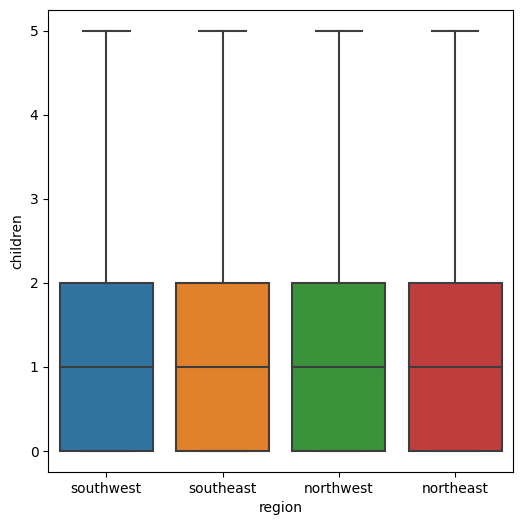

In [33]:
## children Vs region
plt.figure(figsize = (6,6))
sns.boxplot(data = df,x = "region",y = "children")

* It simply means that region does not have any affect number of children.

<Axes: xlabel='region', ylabel='count'>

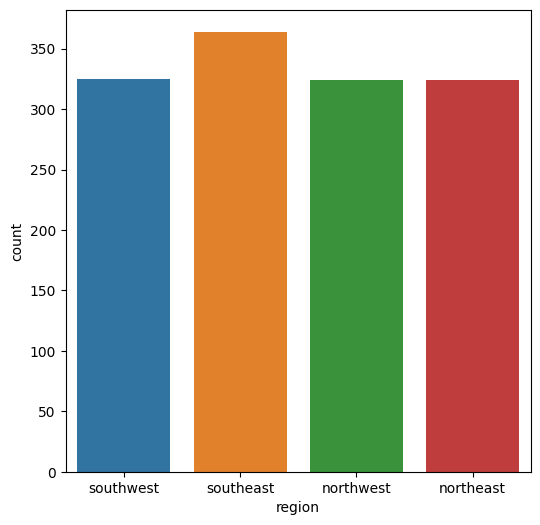

In [35]:
plt.figure(figsize = (6,6))
sns.countplot(data = df,x = "region")

* There is no big difference between number of patients from each region, but overall most patients are from southeast.

<Axes: xlabel='region', ylabel='charges'>

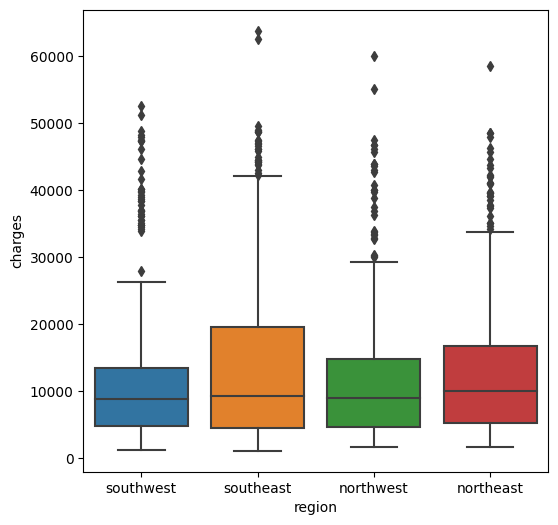

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(data = df,x = "region",y = "charges")

1. On comapring all 4 regions southwest region has low charges, souteast have high  charges.

<Axes: xlabel='region', ylabel='count'>

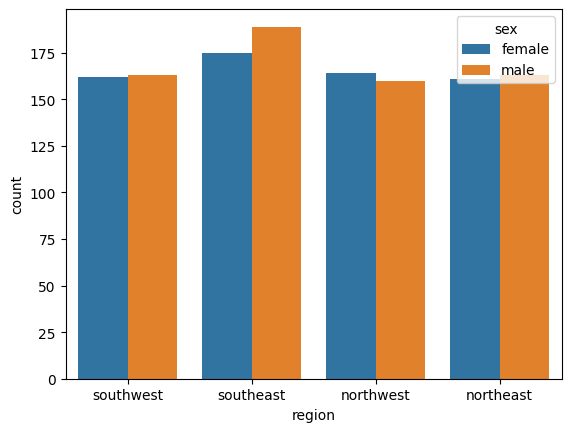

In [37]:
##region Vs sex
sns.countplot(data = df, x = "region" , hue = "sex")

* Southeast region has the highest number of male and female.

<Axes: xlabel='region', ylabel='count'>

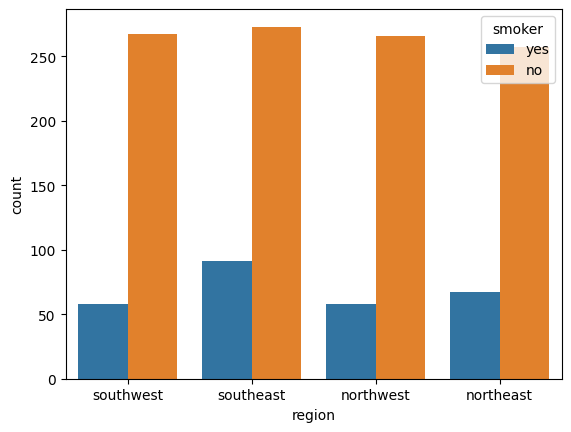

In [38]:
## Region Vs smoker
sns.countplot(data = df,x = "region",hue = "smoker")

1. Southeast region has the highest number of smoking people.

## Target feature:  charges

<Figure size 600x600 with 0 Axes>

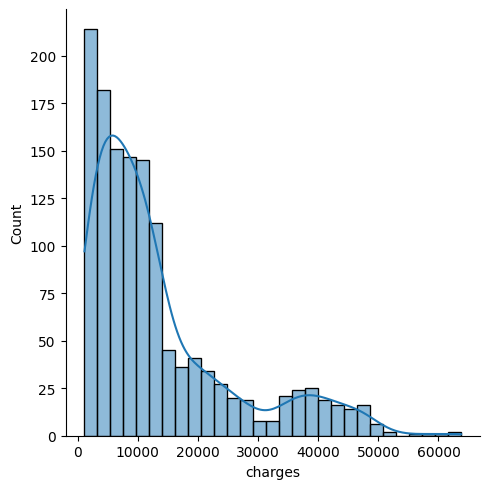

In [39]:
plt.figure(figsize=(6,6))
sns.displot(data = df,x = "charges",kde = True)

1. Positively skewed data.
2. A big spike for charge ranges from 0- 2000.
3. Very few have charges greater than 50000.
4. Person with charge equals to 3000 is low.

In [40]:
numerical_features = []
categorical_features = []

for column in df.columns:
    if df[column].dtype == "object":
        categorical_features.append(column)
    else:
        numerical_features.append(column)

In [41]:
print(numerical_features)

['age', 'bmi', 'children', 'charges']


**Check for Outliers**

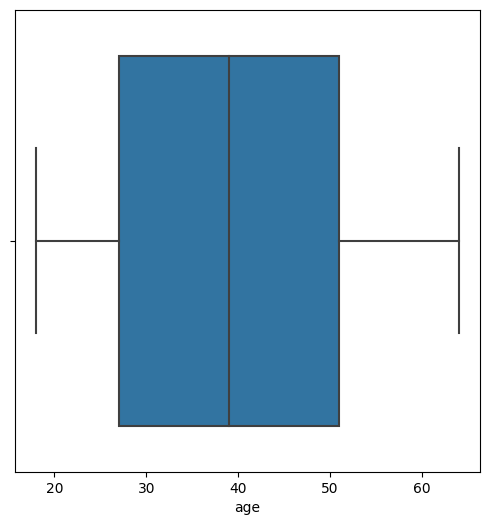

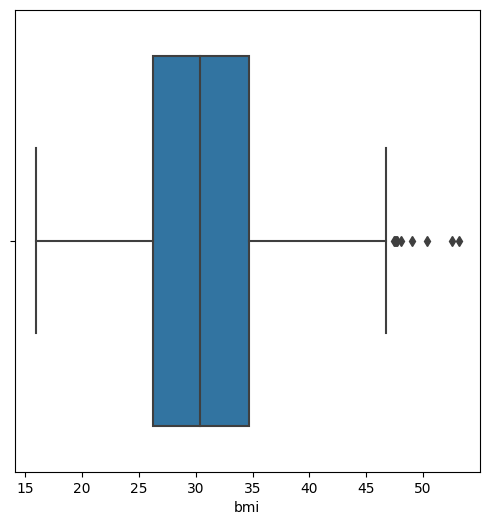

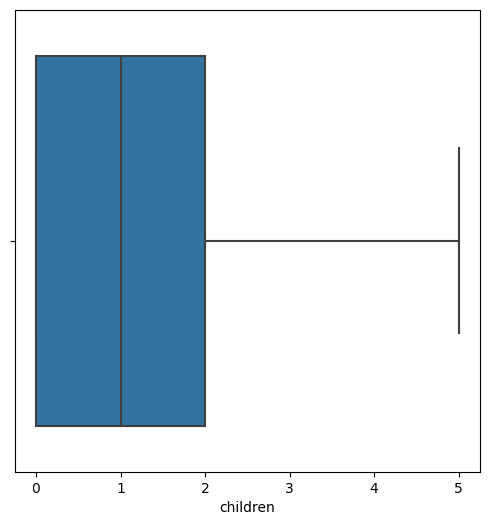

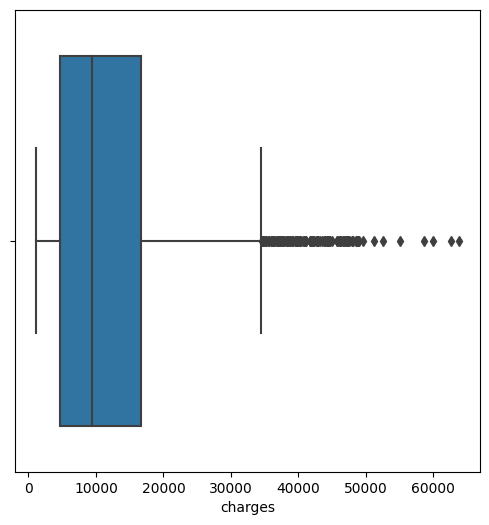

In [42]:
for i in numerical_features:
    plt.figure(figsize = (6,6))
    sns.boxplot(data = df,x = i)

*bmi and charges contains outliers.*

In [44]:
df[df["charges"] > df["charges"].max()].shape

(0, 7)

In [45]:
for i in numerical_features:
    print(f"{i} is skewed for {df[i].skew()}")

age is skewed for 0.054780773126998195
bmi is skewed for 0.28391419385321137
children is skewed for 0.9374206440474123
charges is skewed for 1.5153909108403483


*  As the BMI has 0.28 skewness , so we can leave it as same or can apply RobustScaler on it.
*  On our target feature "charges" we can use log transformations.